# Aplicação

In [1]:
#libs
import pandas as pd
import numpy as np
%matplotlib inline

__DataSet:__ https://www.kaggle.com/rogeriochaves/clickbait-buzzfeed-brasil/discussion/57360#332677

In [2]:
#parse_dates: transforma os dados da coluna no formato passado
p = pd.read_csv('./data_clickbait/clickbait_titles.csv', index_col=0, parse_dates=['timestamp'])
n = pd.read_csv('./data_clickbait/non_clickbait_titles.csv', index_col=0, parse_dates=['timestamp'])
p['y'] = 1
n['y'] = 0

data = pd.concat([p,n], axis=0, ignore_index=True).sort_values("timestamp")

In [3]:
p.head()

,timestamp,title,url,y
0,2018-05-18 19:22:06,"20 imagens que, por incrível que pareça, não s...",https://www.buzzfeed.com/daves4/animais-penis-...,1
1,2018-05-16 17:24:04,24 filmes da Disney explicados por homens que ...,https://www.buzzfeed.com/keelyflaherty/filmes-...,1
2,2018-05-15 17:39:34,Todo mundo é uma princesa da Disney OU um heró...,https://www.buzzfeed.com/perpetua/teste-prince...,1
3,2018-05-10 19:57:22,Quais são as três comidas que combinam com a s...,https://www.buzzfeed.com/joannaborns/teste-tre...,1
4,2018-04-27 21:17:34,Este teste sobre comida vai dizer de uma vez p...,https://www.buzzfeed.com/joannaborns/teste-com...,1


In [4]:
n.head()

,timestamp,title,url,y
0,2018-05-22 21:02:43,Nem todos que assinam manifesto pró-Boulos dec...,https://www.buzzfeed.com/tatianafarah/frei-bet...,0
1,2018-05-22 18:47:46,Centenas de professores universitários não est...,https://www.buzzfeed.com/felitti/centenas-de-p...,0
2,2018-05-22 14:35:14,Janaina Paschoal diz que ser vice de Bolsonaro...,https://www.buzzfeed.com/tatianafarah/janaina-...,0
3,2018-05-21 20:58:21,Russomanno vira sócio de startup financeira qu...,https://www.buzzfeed.com/alexandrearagao/russo...,0
4,2018-05-21 20:21:21,"Governo errou na política para combustíveis, d...",https://www.buzzfeed.com/severinomotta/governo...,0


In [6]:
data.head()

,timestamp,title,url,y
801,2013-08-29 14:48:00,24 Coisas Que As Pessoas Solteiras Estão Cansa...,https://www.buzzfeed.com/ashleyperez/24-coisas...,1
800,2013-08-30 15:10:58,27 Decisões Do Dia-a-dia Que Pessoas De Vinte-...,https://www.buzzfeed.com/regajha/27-decisoes-d...,1
799,2013-09-04 12:07:03,21 Fotos Provando Que Os Irmãos Mais Velhos Tê...,https://www.buzzfeed.com/moerder/21-fotos-prov...,1
798,2013-09-04 16:06:57,30 Sinais De Que Você Tem Quase 30,https://www.buzzfeed.com/jessicamisener/30-sin...,1
1306,2013-10-18 03:29:53,38 Sinais Que Você é Um Basset Hound,https://www.buzzfeed.com/chelseamarshall/38-si...,1


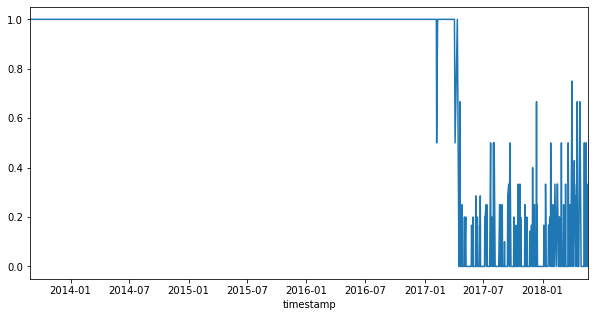

In [5]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

Temos muitos exemplos positivos até junho de 2017

In [7]:
data = data[data['timestamp'] >= "2017-06-01"]

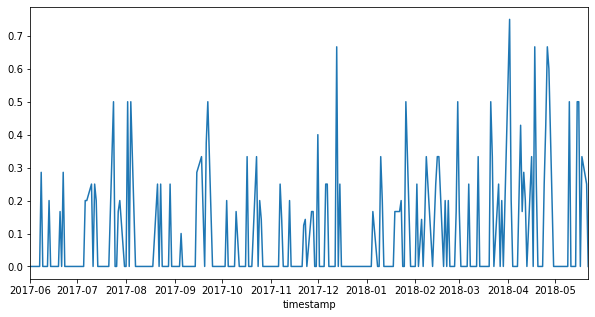

In [8]:
data.groupby(data['timestamp'].dt.date)['y'].mean().plot(figsize=(10,5))

In [9]:
data.head()

,timestamp,title,url,y
2222,2017-06-01 14:13:41,"Peça-chave na Lava Jato, Funaro negocia delaçã...",https://www.buzzfeed.com/filipecoutinho/peca-c...,0
2221,2017-06-01 14:38:39,"Após palestra-culto, o pastor-procurador de MS...",https://www.buzzfeed.com/tatianafarah/o-procur...,0
2220,2017-06-01 15:02:00,Polícia Federal vai chamar Haddad para depor s...,https://www.buzzfeed.com/alexandrearagao/opera...,0
2219,2017-06-01 19:16:59,Defesa de Dilma diz que chapa é única e que Te...,https://www.buzzfeed.com/tatianafarah/defesa-d...,0
2218,2017-06-01 22:04:20,Esses dois amigos do Rio tiraram uma selfie du...,https://www.buzzfeed.com/alexandrearagao/tirot...,0


In [10]:
data['title_proc'] = data['title'].str.lower().str.replace(r'[^\w\s]+', ' ')
data['title_proc'].head()

2222    peça chave na lava jato  funaro negocia delaçã...
2221    após palestra culto  o pastor procurador de ms...
2220    polícia federal vai chamar haddad para depor s...
2219    defesa de dilma diz que chapa é única e que te...
2218    esses dois amigos do rio tiraram uma selfie du...
Name: title_proc, dtype: object

In [11]:
data.shape

(1031, 5)

In [13]:
#Libs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [14]:
#Trains test split
Xtrain, ytrain = data['title_proc'].iloc[:data.shape[0] // 2], data['y'].iloc[:data.shape[0] // 2]
Xtest, ytest = data['title_proc'].iloc[data.shape[0] // 2:], data['y'].iloc[data.shape[0] // 2:]

In [15]:
ytrain.mean()

0.07766990291262135

In [16]:
#baseline
base = np.ones(Xtest.shape[0]) * ytrain.mean()
log_loss(ytest, base)

0.44050839748966253

In [17]:
#Primeiro modelo
mdl = make_pipeline(TfidfVectorizer(min_df=1, ngram_range=(1,1)), 
                    RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state=0))

mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

0.24958750065851476

In [29]:
#Numero de colunas do vocabulary criado
len(mdl.named_steps.tfidfvectorizer.vocabulary_)

756

__Baseline superada__

In [20]:
#Segundo Modelo
mdl = make_pipeline(TfidfVectorizer(min_df=2, ngram_range=(1,1)), 
                    LogisticRegression(C=20., solver='lbfgs'))

mdl.fit(Xtrain, ytrain)
p = mdl.predict_proba(Xtest)[:,1]
log_loss(ytest, p)

0.23797054770590284

__Modelo anterior superado__

In [30]:
#Salvando o modelo com joblib
import joblib as jb
jb.dump(mdl, "mdl.pkl.z")

['mdl.pkl.z']

# API Request

In [32]:
import requests as r
import urllib.parse

__Gunicorn:__ Servidor para servir as API flask

In [63]:
#Requests
#encoded = urllib.parse.quote("10 coisas fodas e baratinhas para alegrar a vida")
#encoded = urllib.parse.quote("Pare de fumar em 5 dias")
encoded = urllib.parse.quote("Aprenda machine learning em 10 dias sem estudar")
#encoded = urllib.parse.quote("Homem é preso por descobrir metodo que ensina a aprender ingles em 1 hora")
#encoded = urllib.parse.quote("Você não acreditar no segredo devastador que o filho de Leonardo, Zé Felipe, possui em sua vida")

In [64]:
res = r.get("http://127.0.0.1:8000/?titulo={}".format(encoded))
res.text

'{"titulo": "Aprenda machine learning em 10 dias sem estudar", "p": 0.007722853873814122}'

Se eu quiser usar o resultado dessa aplicação para outra aplicação por exemplo, transformamos a resposta da request em json:

In [65]:
import json
json.loads(res.text)

{'titulo': 'Aprenda machine learning em 10 dias sem estudar',
 'p': 0.007722853873814122}